### Anaylsis of NYC Collision Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

In [3]:
df = pd.read_csv('data/accidents_with_prediction.csv')

In [4]:
df['prediction'].unique()

array([7, 3, 2, 5, 4, 6, 8, 1, 0])

In [5]:
df.columns

Index(['Unnamed: 0', 'borough', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'cross_street_name', 'timestamp', 'latitude', 'longitude', 'location',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_persons_injured', 'number_of_persons_killed',
       'off_street_name', 'on_street_name', 'unique_key', 'vehicle_type_code1',
       'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5', 'zip_code', 'prediction'],
      dtype='object')

### Ran a Spark Job on the Dataproc to cluster the datapoints into 10 regions based on their Geospatial Information. The code for the Spark Job can be found in the "Jobs" Folder.

Once Clustered, now we have sub-divided the datapoints into multiple regions. Now we can explore each one of them to know how we can reduced the collisions in the particular region.   
- Check which regions / Clusters have most people injured and killed. Focus on ones with higher values.   
- Check the Streets where there are most Collisions. Once we know which streets have higher risk we can improve the Quality by putting more control around that region. Having more Traffic controllers and police patrolling.    
- Check on the possible reason for more accidents around particular Streets. Check on the Taxi Rides frequency in that region.   

In [6]:
def give_top_10(column):
    d0 = pd.DataFrame(df[df['prediction'] == 0][column].value_counts())[:10].index
    d1 = pd.DataFrame(df[df['prediction'] == 1][column].value_counts())[:10].index
    d2 = pd.DataFrame(df[df['prediction'] == 2][column].value_counts())[:10].index
    d3 = pd.DataFrame(df[df['prediction'] == 3][column].value_counts())[:10].index
    d4 = pd.DataFrame(df[df['prediction'] == 4][column].value_counts())[:10].index
    d5 = pd.DataFrame(df[df['prediction'] == 5][column].value_counts())[:10].index
    d6 = pd.DataFrame(df[df['prediction'] == 6][column].value_counts())[:10].index
    d7 = pd.DataFrame(df[df['prediction'] == 7][column].value_counts())[:10].index
    d8 = pd.DataFrame(df[df['prediction'] == 8][column].value_counts())[:10].index

    df1 = pd.DataFrame([d0, d1, d3, d4, d5, d6, d7, d8]).T
    return df1

In [7]:
give_top_10('off_street_name') #Top 10 Accident Collision Off Street Names per Cluster

,0,1,2,3,4,5,6,7
0,1017 EAST 233 STREET,772 EDGEWATER ROAD,110-00 ROCKAWAY BOULEVARD,3 AVENUE,,ATLANTIC AVENUE,131-35 AVERY AVENUE,3 AVENUE
1,None,,625 8 AVENUE,772 EDGEWATER ROAD,961 EAST 174 STREET,1400 PELHAM PARKWAY SOUTH,1 AVENUE,10 GRAND ARMY PLAZA
2,None,2 AVENUE,772 EDGEWATER ROAD,,1 AVENUE,1 AVENUE,112 RICHMOND HILL ROAD,250 WEST 34 STREET
3,None,3 AVENUE,139 FLATBUSH AVENUE,110-00 ROCKAWAY BOULEVARD,2800 VICTORY BOULEVARD,112 RICHMOND HILL ROAD,2800 VICTORY BOULEVARD,2655 RICHMOND AVENUE
4,None,110-00 ROCKAWAY BOULEVARD,5 AVENUE,2 AVENUE,2655 RICHMOND AVENUE,2655 RICHMOND AVENUE,,320 EAST 57 STREET
5,None,10 COLUMBUS CIRCLE,320 EAST 57 STREET,40 WEST 225 STREET,2 AVENUE,625 ATLANTIC AVENUE,95 EAST HOUSTON STREET,2 AVENUE
6,None,462 1 AVENUE,135 WEST 50 STREET,2975 RICHMOND AVENUE,NORTHERN BOULEVARD,3 AVENUE,758 ARTHUR KILL ROAD,MADISON AVENUE
7,None,961 EAST 174 STREET,3 AVENUE,825 AVENUE OF THE AMERICAS,EAST 57 STREET,2820 SNYDER AVENUE,501 GATEWAY DRIVE,110-00 ROCKAWAY BOULEVARD
8,None,135-05 20 AVENUE,2 PENNSYLVANIA PLAZA,2800 VICTORY BOULEVARD,3 AVENUE,LEXINGTON AVENUE,691 FDR DRIVE,1 ORCHARD BEACH ROAD
9,None,LEXINGTON AVENUE,350 5 AVENUE,1250 WATERS PLACE,450 FLATBUSH AVENUE,462 1 AVENUE,110-00 ROCKAWAY BOULEVARD,333 LAFAYETTE AVENUE


In [8]:
give_top_10('on_street_name') #Top 10 Accident Collision On Street Names per Cluster

,0,1,2,3,4,5,6,7
0,JAMAICA AVENUE,BROADWAY,BROADWAY,BROADWAY,BROADWAY,BROADWAY,2 AVENUE,2 AVENUE
1,VARICK STREET,3 AVENUE,2 AVENUE,3 AVENUE,3 AVENUE,2 AVENUE,3 AVENUE,BROADWAY
2,3 AVENUE,2 AVENUE,ATLANTIC AVENUE,2 AVENUE,2 AVENUE,ATLANTIC AVENUE,BROADWAY,3 AVENUE
3,BROOKVILLE BOULEVARD,ATLANTIC AVENUE,3 AVENUE,ATLANTIC AVENUE,ATLANTIC AVENUE,3 AVENUE,ATLANTIC AVENUE,ATLANTIC AVENUE
4,WEST 37 STREET,BROOKLYN QUEENS EXPRESSWAY,GRAND CENTRAL PKWY,1 AVENUE,1 AVENUE,NORTHERN BOULEVARD,NORTHERN BOULEVARD,LONG ISLAND EXPRESSWAY
5,SAINT MARKS AVENUE,NORTHERN BOULEVARD,BELT PARKWAY,5 AVENUE,5 AVENUE,1 AVENUE,GRAND CENTRAL PKWY,1 AVENUE
6,ROEBLING STREET,5 AVENUE,1 AVENUE,NORTHERN BOULEVARD,BELT PARKWAY,BROOKLYN QUEENS EXPRESSWAY,LEXINGTON AVENUE,FDR DRIVE
7,MAJOR DEEGAN EXPRESSWAY,1 AVENUE,5 AVENUE,BROOKLYN QUEENS EXPRESSWAY,NORTHERN BOULEVARD,BELT PARKWAY,FDR DRIVE,NORTHERN BOULEVARD
8,21 STREET,BELT PARKWAY,NORTHERN BOULEVARD,BELT PARKWAY,PARK AVENUE,PARK AVENUE,1 AVENUE,5 AVENUE
9,BRUCKNER EXPRESSWAY,LONG ISLAND EXPRESSWAY,8 AVENUE,LEXINGTON AVENUE,BROOKLYN QUEENS EXPRESSWAY,FDR DRIVE,5 AVENUE,LEXINGTON AVENUE


In [9]:
def summarize_heatmap(column, annot=False, show=True, exclude_first=False, make_sum=False, show_df=True):
    d0 = dict(df[df['prediction'] == 0][column].value_counts())
    d1 = dict(df[df['prediction'] == 1][column].value_counts())
    d2 = dict(df[df['prediction'] == 2][column].value_counts())
    d3 = dict(df[df['prediction'] == 3][column].value_counts())
    d4 = dict(df[df['prediction'] == 4][column].value_counts())
    d5 = dict(df[df['prediction'] == 5][column].value_counts())
    d6 = dict(df[df['prediction'] == 6][column].value_counts())
    d7 = dict(df[df['prediction'] == 7][column].value_counts())
    d8 = dict(df[df['prediction'] == 8][column].value_counts())

    df1 = pd.DataFrame([d0, d1, d3, d4, d5, d6, d7, d8]).T
    df1.fillna(0, inplace=True)
    
    if(exclude_first):
        df1 = df1.iloc[1:]
        
    if make_sum:
        summ = dict()
        for i in range(8):
            summ[i] = sum(df1.iloc[:, i])
        print(summ)
        
    if show:
        plt.figure(figsize=(15, 15))
        sns.heatmap(df1, cmap="YlGnBu", annot=annot)
        plt.show()
    
    if show_df:
        return df1

**There were more than 4000 people injured in collisions in Cluster 1 and 4.   
Whereas, Cluster 2 and 3 have 3500+ people injured.**  

In [31]:
summarize_heatmap('number_of_persons_injured', True, False, True, True, True)

{0: 3.0, 1: 4501.0, 2: 3512.0, 3: 3886.0, 4: 4024.0, 5: 2473.0, 6: 2046.0, 7: 2547.0}


,0,1,2,3,4,5,6,7
1.0,1.0,3099.0,2448.0,2664.0,2726.0,1706.0,1413.0,1715.0
2.0,2.0,867.0,655.0,738.0,763.0,468.0,385.0,507.0
3.0,0.0,317.0,235.0,274.0,308.0,159.0,155.0,177.0
4.0,0.0,135.0,85.0,132.0,132.0,87.0,54.0,86.0
5.0,0.0,49.0,48.0,40.0,51.0,29.0,19.0,40.0
6.0,0.0,14.0,20.0,17.0,28.0,13.0,12.0,12.0
7.0,0.0,11.0,14.0,13.0,8.0,7.0,4.0,2.0
8.0,0.0,3.0,4.0,4.0,4.0,1.0,3.0,1.0
9.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,3.0
10.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0


**Again, Cluster 1 and 4 has places where more people are killed. The no. of death is negligible in comparision with injured people so overall all the areas can be considered safe.**

In [32]:
summarize_heatmap('number_of_persons_killed', True, False, True, True, True)

{0: 0.0, 1: 14.0, 2: 11.0, 3: 9.0, 4: 14.0, 5: 6.0, 6: 8.0, 7: 6.0}


,0,1,2,3,4,5,6,7
1.0,0.0,14.0,10.0,8.0,14.0,6.0,8.0,6.0
2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


**A different combination of cities is present in each cluster. Manhattan has most data points.**

In [10]:
df['vehicle_type_code1--vehicle_type_code2'] = df['vehicle_type_code1'] + ' <-> ' + df['vehicle_type_code2']

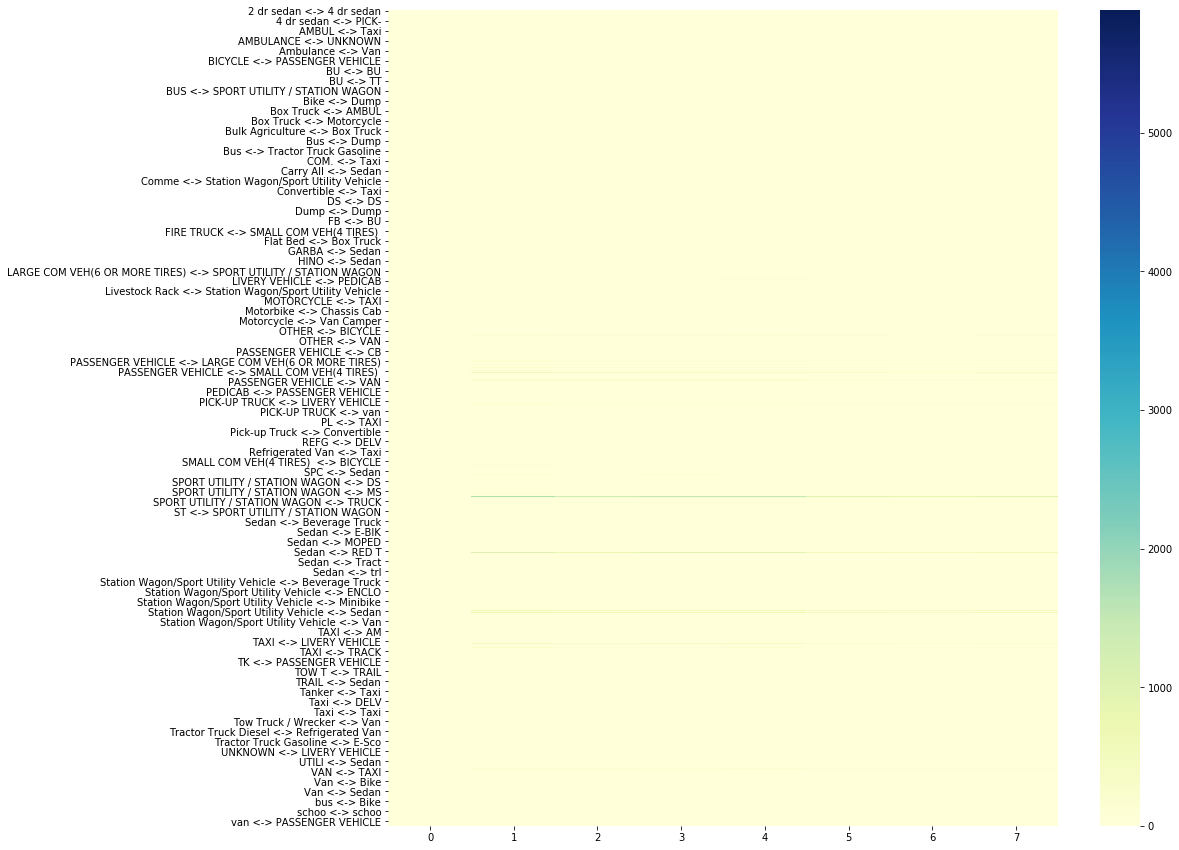

In [35]:
summarize_heatmap('vehicle_type_code1--vehicle_type_code2', False, True, False, False, False)

Sport Utility with MS / Sedan / Minibike and Sedan with Red T / Mopet have many collisions.

**Cluster 5 covers Passenger Vehicle vs Large Com / Small Com Vehicles. Each Cluster has some major type of Collision dominent. Next is the Breakdown analysis. Each prediction has a dominent Borough, check the correlation between the collision type, Borough and Cluster assigned**

## Looking at the trends, seasonality and fluctuations in the dataset by looking at the individual clusters and the effect on that cluster per borough.

In [11]:
def extract_ddy(date):
    dd = date.split(' ')
    year_month = dd[0][:7]
    year = int(year_month[:4])
    month = int(year_month[5:7])
    hour = int(dd[1][:2])
    return year_month, year, month, hour

In [12]:
ym, y, m, h = [], [], [], []

for i in range(len(df)):
    a, b, c, d= extract_ddy(df.timestamp[i])
    ym.append(a)
    y.append(b)
    m.append(c)
    h.append(d)

In [13]:
df['year_month'] = ym
df['year'] = y
df['month'] = m
df['hour'] = h

In [14]:
df['number_of_affected_people'] = \
        df['number_of_persons_injured']+df['number_of_persons_killed']


In [15]:
def show_trends(cluster):
    ts1 = df[df['prediction'] == cluster].groupby(['borough', 'year_month'])['number_of_affected_people']\
    .sum().unstack().reset_index().melt(id_vars='borough')

    d1 = ts1[ts1['borough'] == 'BRONX']
    d1['value_BRONX'] = d1['value']
    d1.drop(columns=['value', 'borough'], inplace=True)

    d2 = ts1[ts1['borough'] == 'BROOKLYN']
    d2['value_BROOKLYN'] = d2['value']
    d2.drop(columns=['value', 'borough'], inplace=True)

    d3 = ts1[ts1['borough'] == 'MANHATTAN']
    d3['value_MANHATTAN'] = d3['value']
    d3.drop(columns=['value', 'borough'], inplace=True)

    d4 = ts1[ts1['borough'] == 'QUEENS']
    d4['value_QUEENS'] = d4['value']
    d4.drop(columns=['value', 'borough'], inplace=True)

    d5 = ts1[ts1['borough'] == 'STATEN ISLAND']
    d5['value_STATEN'] = d5['value']
    d5.drop(columns=['value', 'borough'], inplace=True)

    a1 = pd.merge(d1, d2, on='year_month')
    a2 = pd.merge(d3, d4, on='year_month')
    a3 = pd.merge(a1, a2, on='year_month')
    d = pd.merge(d5, a3, on='year_month')

    d.fillna(0, inplace=True)

    y_LL = 0
    y_UL = int(d.iloc[:, 1:].max().max()*1.1)
    y_interval = 5
    mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink']    

    # Draw Plot and Annotate
    fig, ax = plt.subplots(1,1,figsize=(24, 6), dpi= 80)    

    columns = d.columns[1:]  
    for i, column in enumerate(columns):
        plt.plot(d.year_month.values, d[column].values, lw=1.5, color=mycolors[i])    
        plt.text(d.shape[0]+1, d[column].values[-9], column, fontsize=9, color=mycolors[i])

    # Draw Tick lines  
    for y in range(y_LL, y_UL, y_interval):    
        plt.hlines(y, xmin=0, xmax=80, colors='black', alpha=0.3, linestyles="--", lw=0.5)

    # Decorations    
    plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                    labelbottom=True, left=False, right=False, labelleft=True)        

    # Lighten borders
    plt.gca().spines["top"].set_alpha(.3)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(.3)
    plt.gca().spines["left"].set_alpha(.3)

    plt.title('NY BOROUGH Traffic Accident', fontsize=12)
    plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=9)    
    plt.xticks(range(0, d.shape[0], 6), d.year_month.values[::6], horizontalalignment='left', fontsize=9)    
    plt.ylim(y_LL, y_UL)    
    plt.xlim(-1, 81)    
    plt.show()

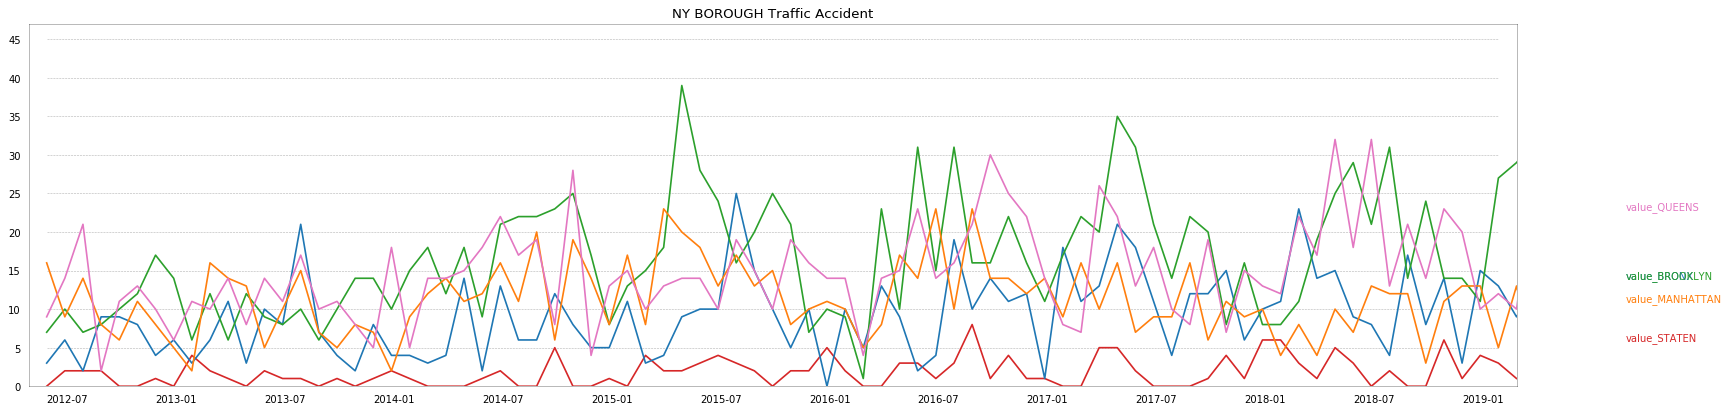

In [16]:
show_trends(1)

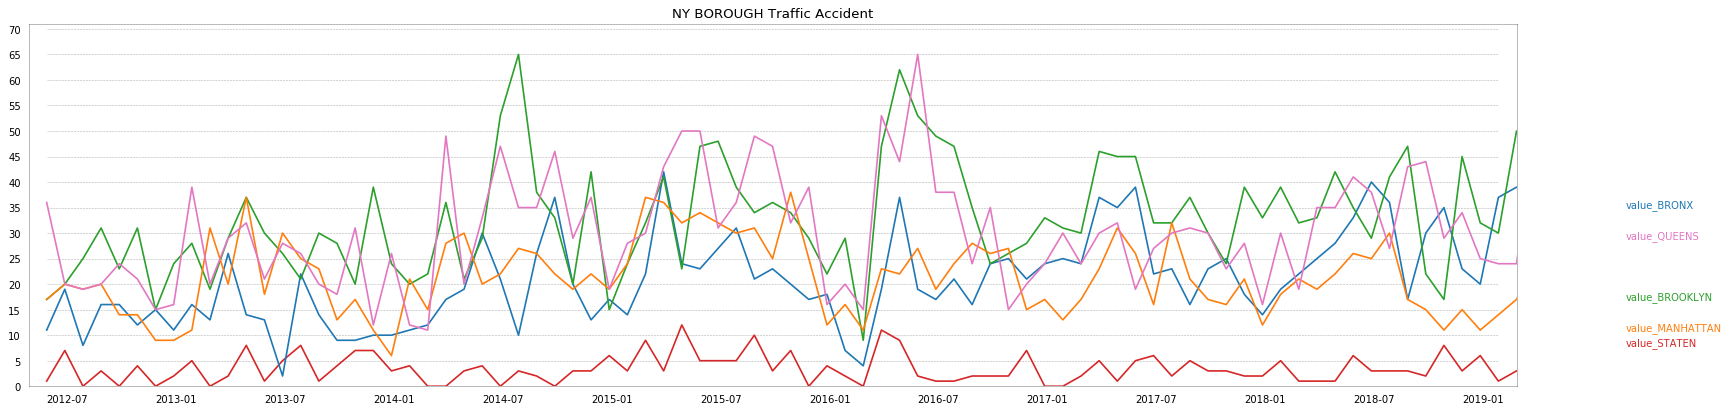

In [17]:
show_trends(2)

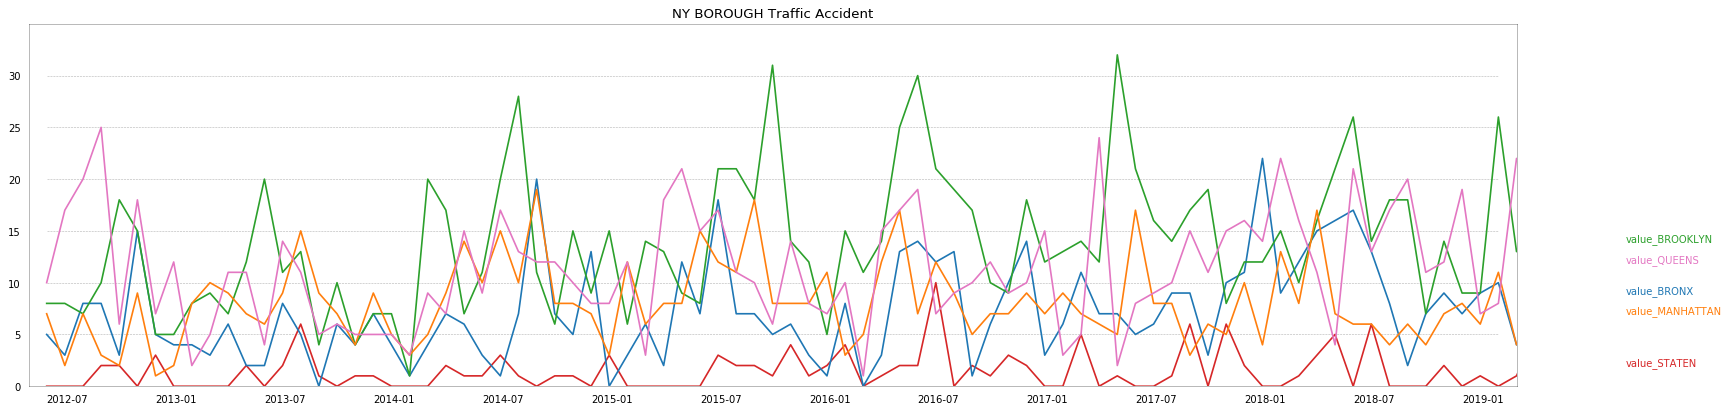

In [18]:
show_trends(3)

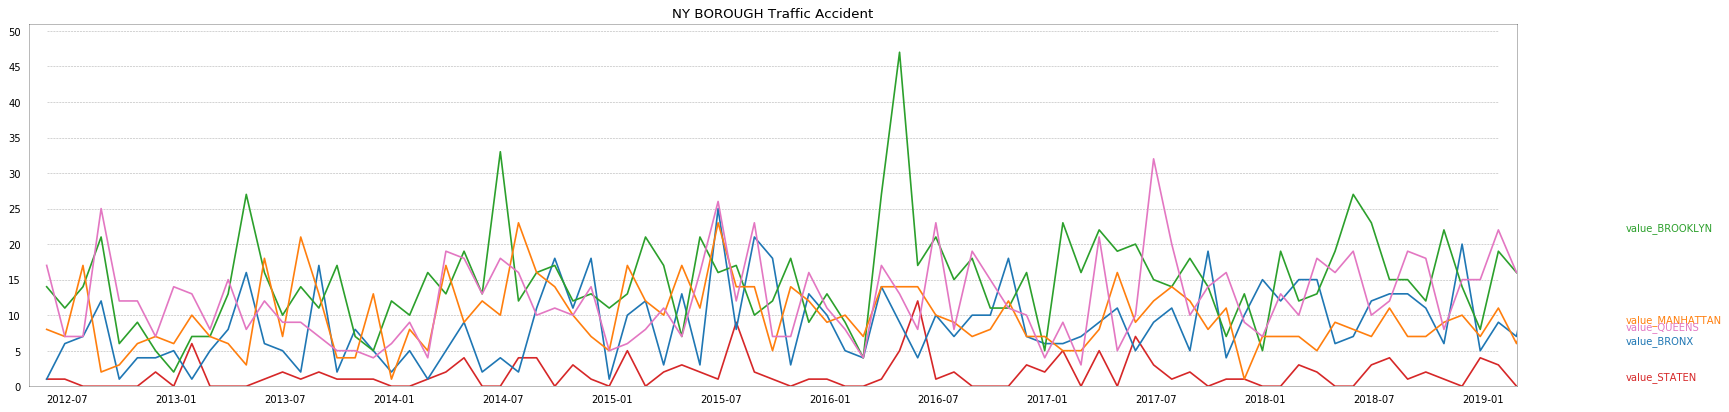

In [19]:
show_trends(4)

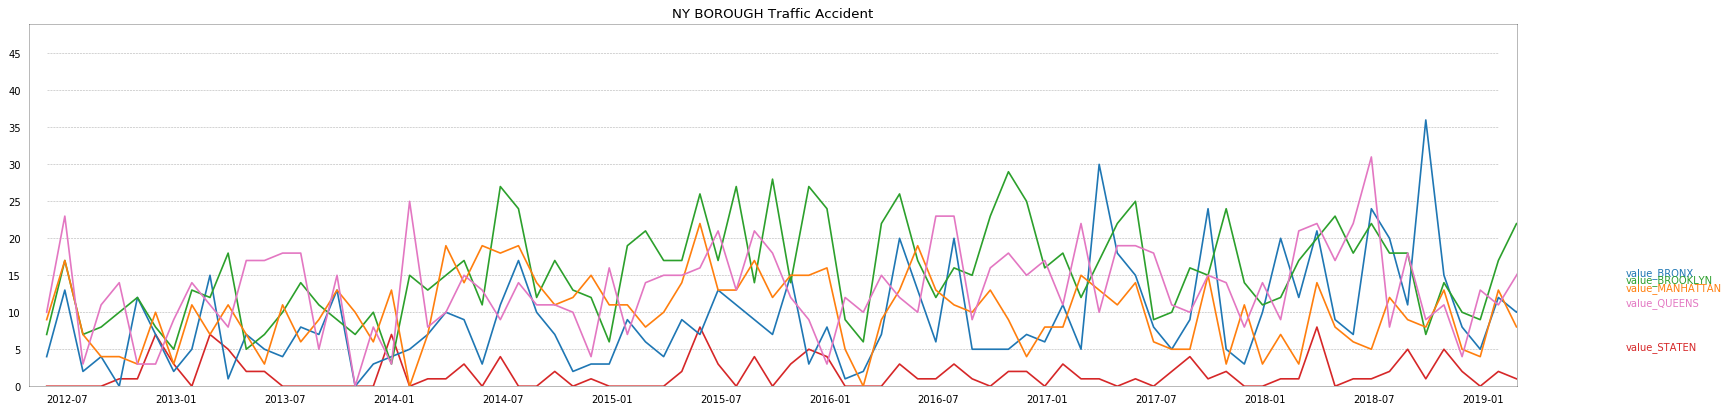

In [20]:
show_trends(5)

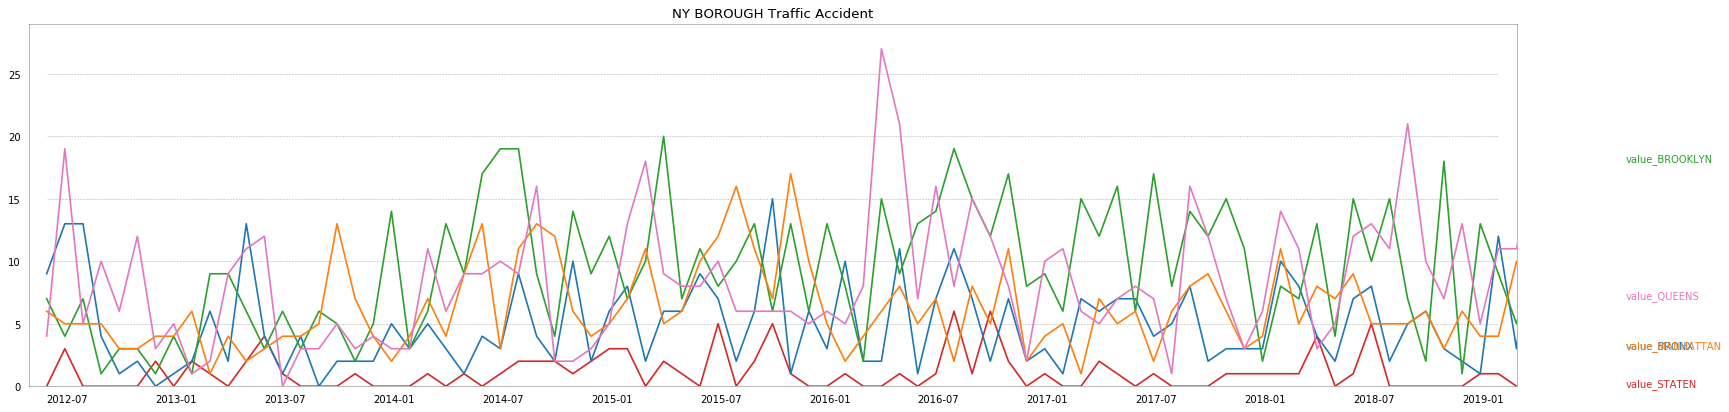

In [21]:
show_trends(6)

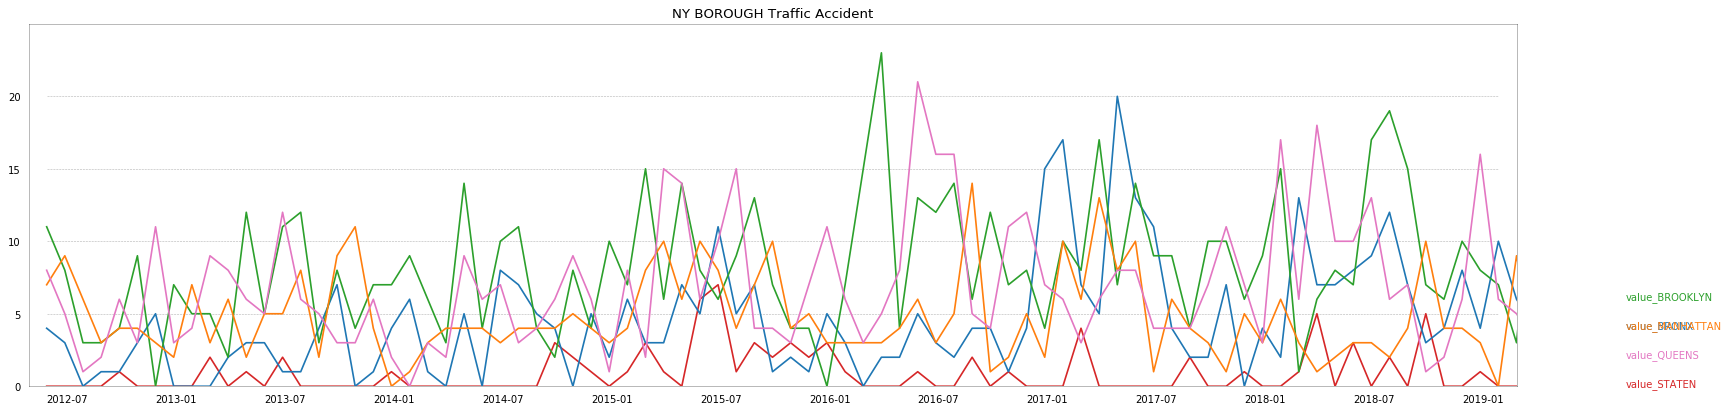

In [22]:
show_trends(7)

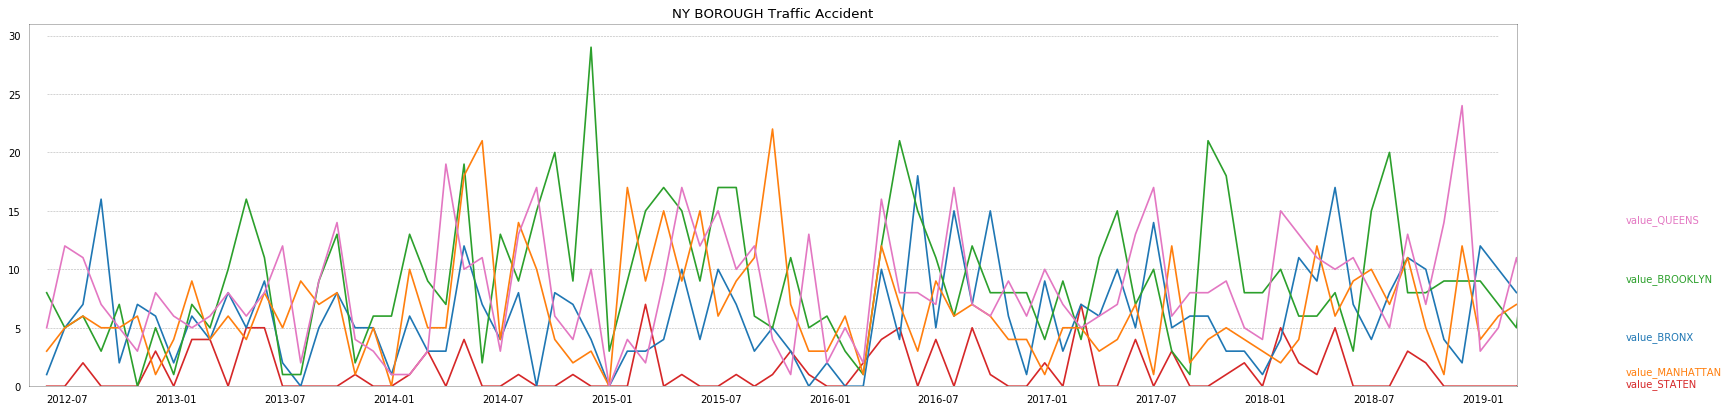

In [23]:
show_trends(8)

#### Above Observations indicate a few distinct things about the Clusters:   
-  Max. Collision is -- Cluster 1: 45, Cluster 2: 70, Cluster 3: 35, Cluster 3: 50, Cluster 4: 40, Cluster 5: 25, Cluster 6: 20, Cluster 7: 30. This clusters are rather useful as it aggregates the geospatial data on the important factor i.e. # of Collisions instead of just it's location.    
    
-  In each Cluster, we see that there is also a shift in ordering of the borough trends which are also interesting to look out for. The new Cluster and the borough information is coorelated closely.  

#### Further Analysis - Breakdown into Month and Year

In [24]:
ds = df['year_month'].value_counts()
hs = df['hour'].value_counts()
ms = df['month'].value_counts()

d1 = pd.DataFrame({"date": ds.index, "statistics": ds})
d1.index = range(len(ds))

h1 = pd.DataFrame({"hour": hs.index, "statistics": hs})
h1.index = range(len(hs))

m1 = pd.DataFrame({"month": ms.index, "statistics": ms})
m1.index = range(len(ms))

d1['index'] = d1['date']
m1['index'] = m1['month']
h1['index'] = h1['hour']

d0 = d1.groupby('index').first()
h0 = h1.groupby('index').first()
m0 = m1.groupby('index').first()

In [25]:
d0.drop('2019-07', inplace=True)
d0.drop('2019-08', inplace=True)

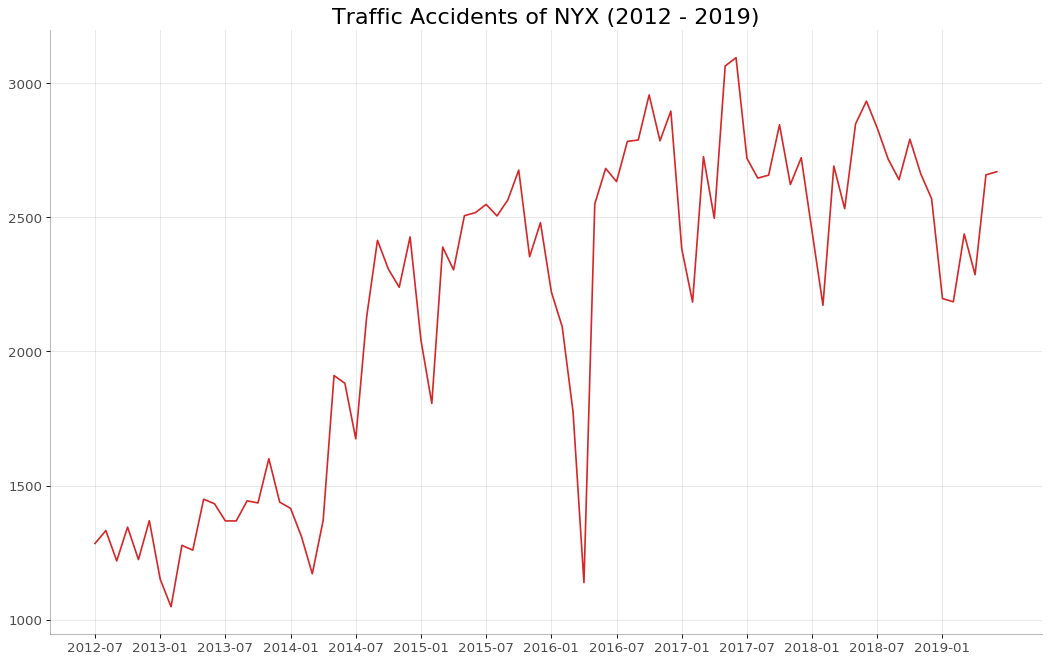

In [26]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'statistics', data=d0, color='tab:red')

#plt.ylim(13500, 22500)
xtick_location = d0['date'].tolist()[::6]
plt.xticks(xtick_location,xtick_location, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Traffic Accidents of NYX (2012 - 2019)", fontsize=20)
plt.grid(axis='both', alpha=.3)

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [27]:
import matplotlib as mpl

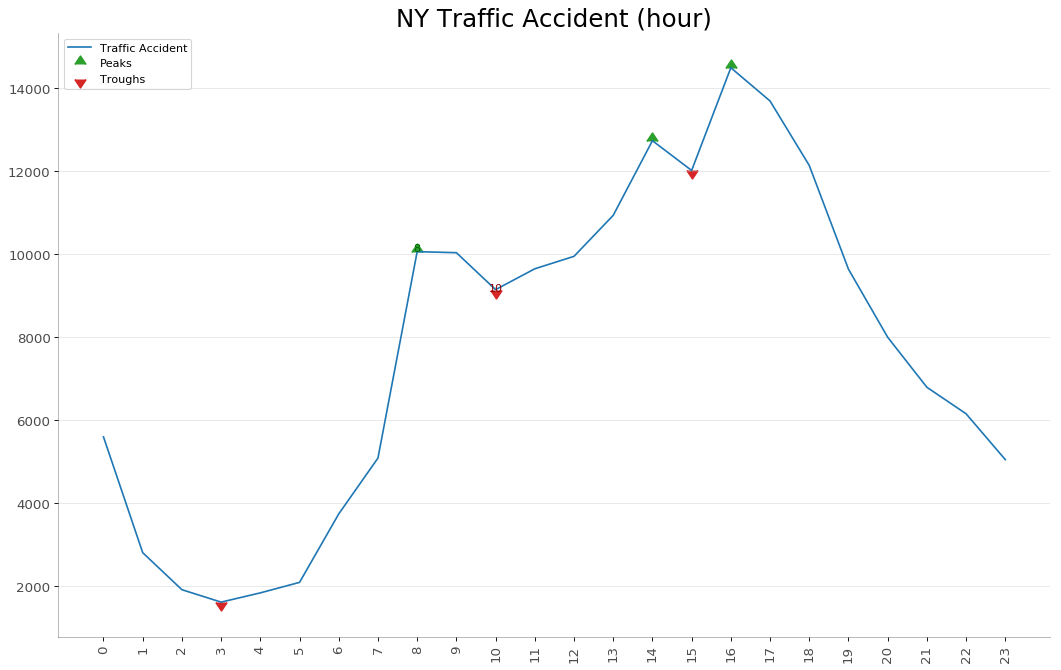

In [28]:
statistics_value = h0['statistics'].values
doublediff = np.diff(np.sign(np.diff(statistics_value)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*statistics_value)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('hour', 'statistics', data=h0, color='tab:blue', label='Traffic Accident')
plt.scatter(h0.hour[peak_locations], h0.statistics[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(h0.hour[trough_locations], h0.statistics[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(h0.hour[p], h0.statistics[p]+15, h0.hour[p], horizontalalignment='center', color='darkgreen')
    plt.text(h0.hour[t], h0.statistics[t]-35, h0.hour[t], horizontalalignment='center', color='darkred')

# Decoration
#plt.ylim(10000,110000)
xtick_location = h0['hour'].tolist()[::1]
xtick_labels = xtick_location
plt.xticks(xtick_location, xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("NY Traffic Accident (hour)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

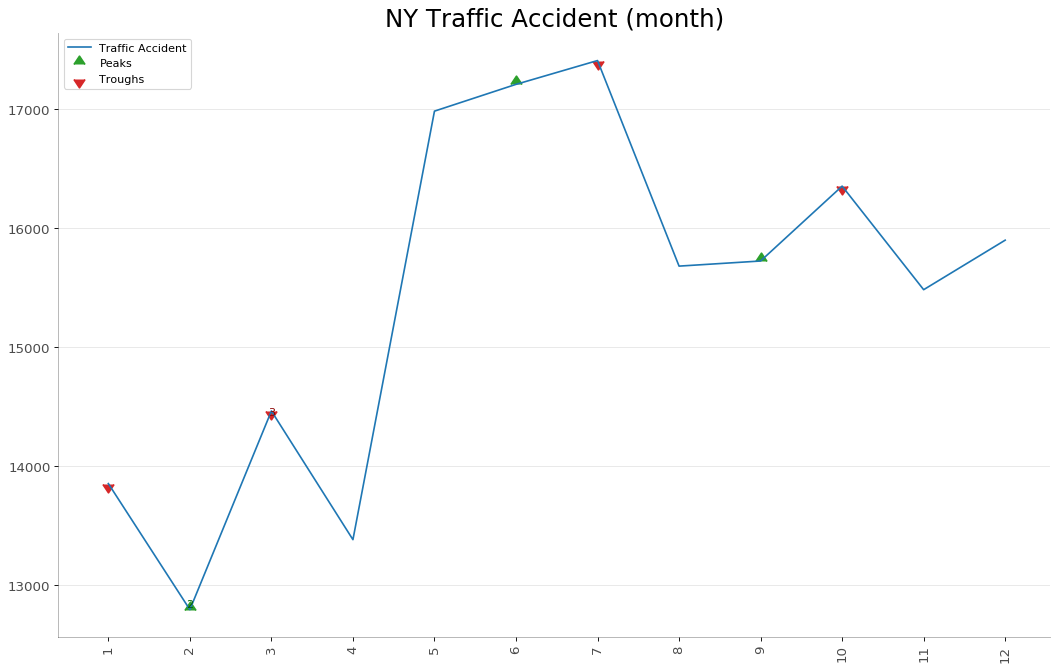

In [29]:
statistics_value = m0['statistics'].values
doublediff = np.diff(np.sign(np.diff(statistics_value)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*statistics_value)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'statistics', data=m0, color='tab:blue', label='Traffic Accident')
plt.scatter(m0.month[peak_locations], m0.statistics[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(m0.month[trough_locations], m0.statistics[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(m0.month[p], m0.statistics[p]+15, m0.month[p], horizontalalignment='center', color='darkgreen')
    plt.text(m0.month[t], m0.statistics[t]-35, m0.month[t], horizontalalignment='center', color='darkred')

# Decoration
#plt.ylim(100000,140000)
xtick_location = m0['month'].tolist()[::1]
xtick_labels = xtick_location
plt.xticks(xtick_location, xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("NY Traffic Accident (month)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()


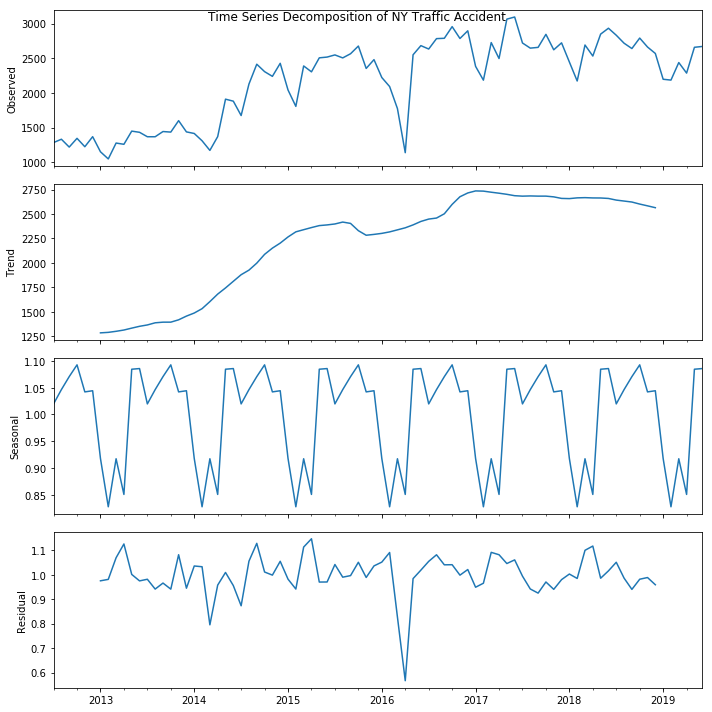

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in d0['date']])
d0.set_index(dates, inplace=True)

# Decompose 
result = seasonal_decompose(d0['statistics'], model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of NY Traffic Accident')
plt.show()

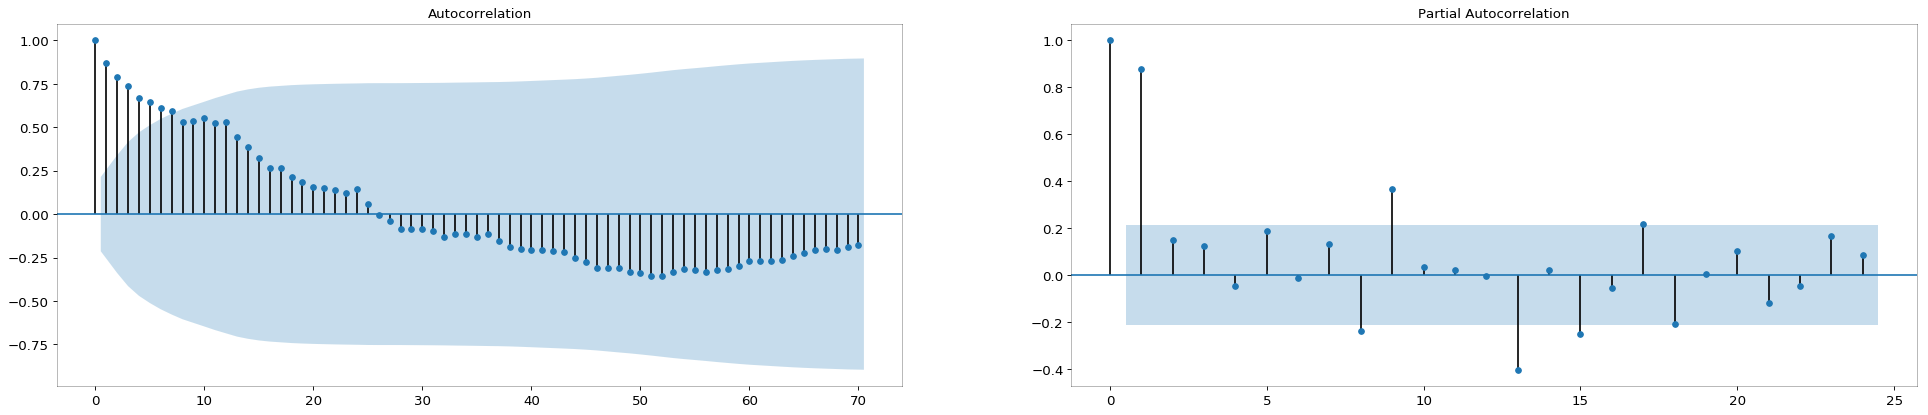

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,6), dpi= 80)
plot_acf(d0.statistics.tolist(), ax=ax1, lags=70)
plot_pacf(d0.statistics.tolist(), ax=ax2, lags=24)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Reference: https://www.kaggle.com/weiyunchen/nypd-mv-collisions